$\textbf{Voltage and Bowl Calibration}$

$\text{After the cropping the dataset we can do the voltage and bowl correction to clibrate the data.}$

In [28]:
%matplotlib notebook
import os
import os.path as path
import numpy as np
from IPython.display import display

# Local module and scripts
from pyccapt.calibration.calibration_tools import variables, tools, data_tools, data_loadcrop
from pyccapt.calibration.calibration_tools import widgets as wd
from pyccapt.calibration.mc import mc_tools



In [2]:
# flightPathLength = 110 # mm 
# # The initial value for t_0
# t0 = 51.74 # ns

# dataset name
# AL_data_b
# OLO_AL_6_data
# OLO_W_6_data
# OLO_Ni_8_data
# X6Cr17_2V30Min_5_data
# data_1029_Jun-27-2022_15-53_Pd
# data_115_Jul-27-2022_17-44_Powersweep3

In [3]:
tdc, dataset, flightPathLength_d, t0_d = wd.dataset_tdc_selection()
display(tdc, dataset, flightPathLength_d, t0_d)

Dropdown(description='TDC model:', options=('surface_concept', 'roentdec'), value='surface_concept')

Text(value='OLO_AL_6_data', description='Dataset:', placeholder='Paste ticket description here!')

Text(value='110', description='Flight path length:', placeholder='Flight path length')

Text(value='51.74', description='t0:', placeholder='T_0 of the instrument')

In [26]:
tdc_model = tdc.value

dataset_name = dataset.value

flightPathLength = float(flightPathLength_d.value) # mm 
# The initial value for t_0
t0 = float(t0_d.value) # ns

p = path.abspath(path.join("", "../../../.."))

path_main = os.path.join(p, 'tests//data')
filename_main = path_main + '//' + dataset_name + '.h5'

variables.init()

variables.path = os.path.join(p, 'tests//results//load_crop')
variables.result_path = os.path.join(p, 'tests/results/vol_bowl_calibratin/' + dataset_name)
if not os.path.isdir(variables.result_path):
        os.makedirs(variables.result_path, mode=0o777, exist_ok=True)
        
filename = variables.path + '//' + dataset_name + '//' + dataset_name + '_cropped' + '.h5'



head, tail = os.path.split(filename)
figname = os.path.splitext(tail)[0]

data = data_tools.read_hdf5_through_pandas(filename)


dld_highVoltage = data['dld/high_voltage'].to_numpy()
dld_pulseVoltage = data['dld/pulse_voltage'].to_numpy()
dld_startCounter = data['dld/start_counter'].to_numpy()
dld_t = data['dld/t'].to_numpy()
dld_x = data['dld/x'].to_numpy()
dld_y = data['dld/y'].to_numpy()

In [8]:
data

dld/high_voltage  dld/pulse_voltage  dld/start_counter        dld/t  \
0             6114.609863        6114.609863            57810.0   618.200694   
1             6114.609863        6114.609863            57812.0  3703.292568   
2             6114.609863        6114.609863            57850.0   596.522556   
3             6114.609863        6114.609863            58108.0   613.256076   
4             6114.609863        6114.609863            58138.0   592.544916   
...                   ...                ...                ...          ...   
1179841       7952.031250        7952.031250            54449.0   536.076144   
1179842       7952.031250        7952.031250            54463.0   534.690828   
1179843       7952.031250        7952.031250            54607.0   540.705294   
1179844       7952.031250        7952.031250            54665.0   541.720278   
1179845       7952.031250        7952.031250            54724.0   530.054820   

             dld/x      dld/y  
0         9.137143 -12.957551  
1        18.369796 -22.349388  
2         5.985306 -10.060408  
3        20.534694 -20.057143  
4        17.764898 -23.304490  
...            ...        ...  
1179841 -12.225306   8.468571  
1179842  -1.114286 -17.860408  
1179843  28.621224  -5.635102  
1179844  28.111837  -9.232653  
1179845   2.833469  -4.266122  

[1179846 rows x 6 columns]

In [9]:
# t0
dld_t = dld_t - t0

In [10]:
# Remove negative and zero TOF
threshold = 70
dld_highVoltage = dld_highVoltage[dld_t>threshold]
dld_pulseVoltage = dld_pulseVoltage[dld_t>threshold]
dld_startCounter = dld_startCounter[dld_t>threshold]
dld_x = dld_x[dld_t>threshold]
dld_y = dld_y[dld_t>threshold]
dld_t = dld_t[dld_t>threshold]

09-21-2022 15:18:58 | INFO | Selected Mode = count
09-21-2022 15:18:58 | INFO | Selected Mode = count
09-21-2022 15:18:58 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


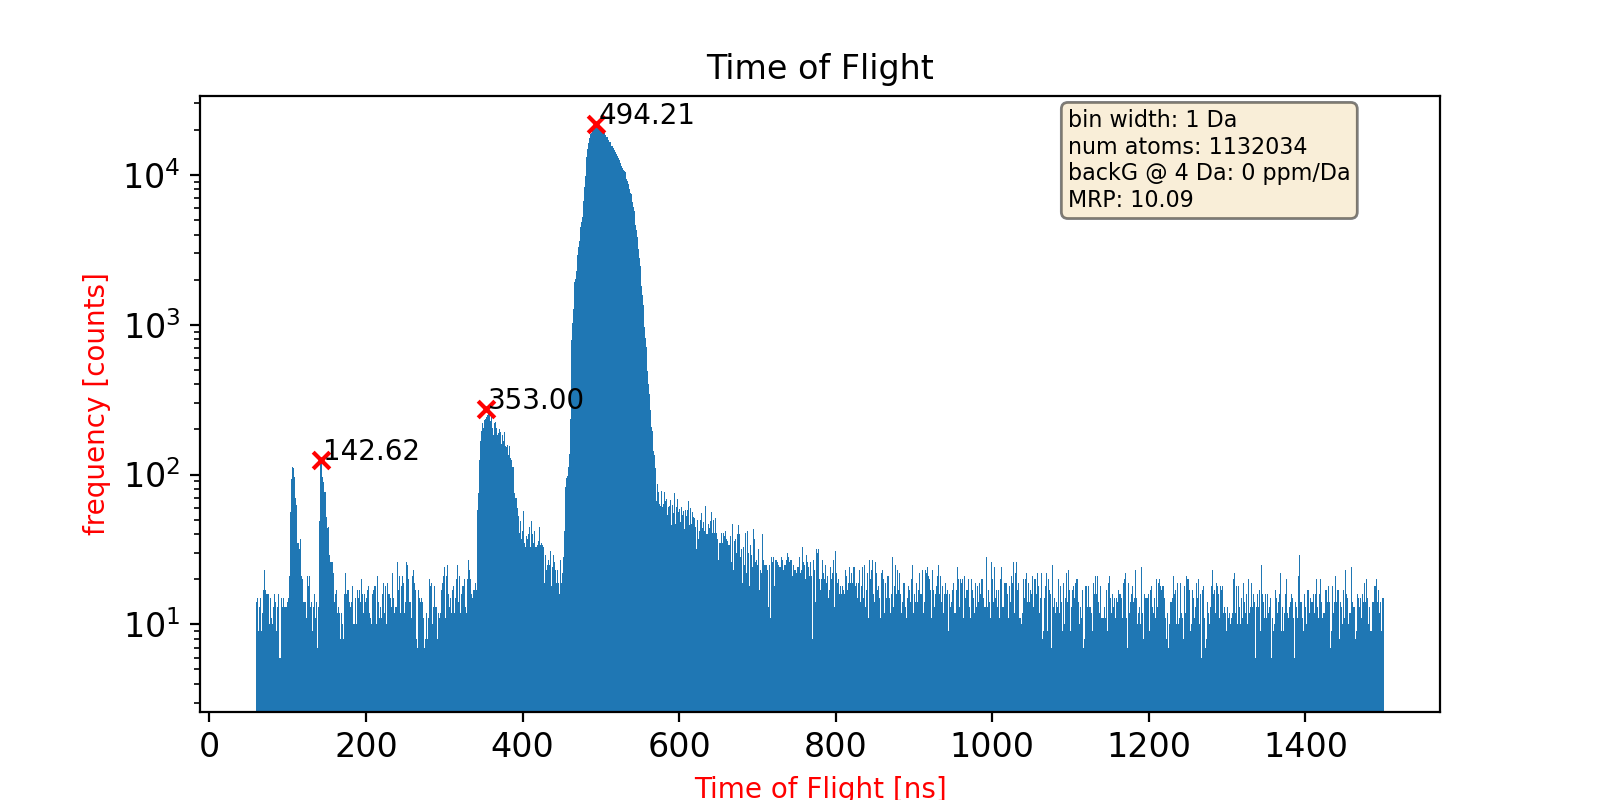

In [12]:
max_hist_tof, left_right_peaks_tof, peaks_sides_tof, max_paek_edges_tof, index_max_tof = tools.massSpecPlot(dld_t[dld_t < 1500], 1, distance=100, percent=50, prominence=100, plot=True, label='tof')

$\text{Plot the m/c. It is possible to modify the peak selection algorithm by seting different value for prominance and distance variable in massSpecPlot function.}$

09-21-2022 15:19:06 | INFO | Selected Mode = count
09-21-2022 15:19:06 | INFO | Selected Mode = count
09-21-2022 15:19:06 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


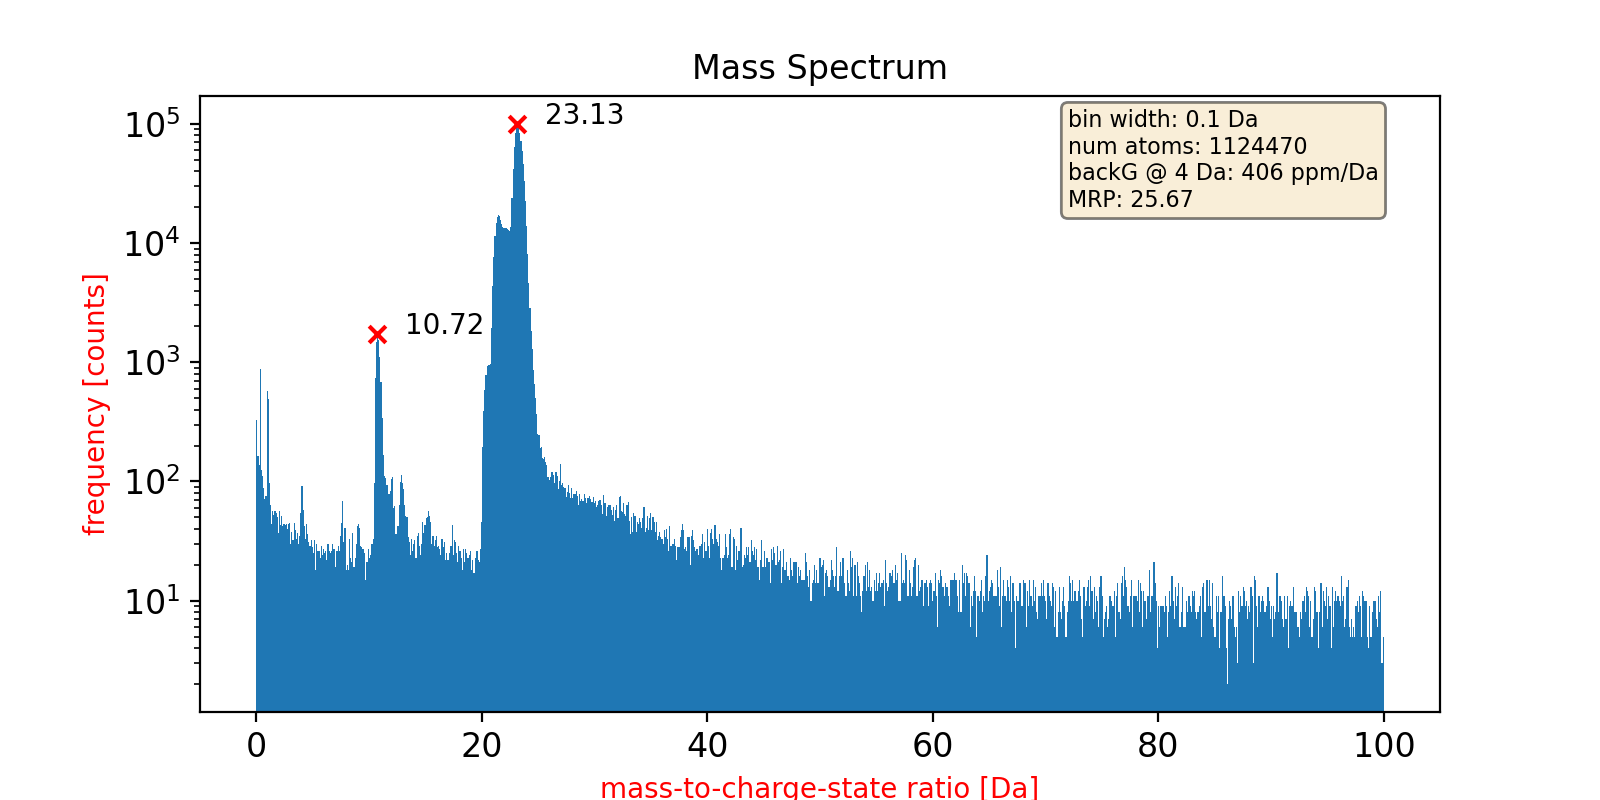

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [25.67416659]
Peaks  0 is: 10.72 peak window sides are: 10.52 - 11.02
Peaks  1 is: 23.13 peak window sides are: 22.73 - 23.63


In [13]:
mc_seb = mc_tools.tof2mc(dld_t, t0, dld_highVoltage, dld_pulseVoltage, dld_x, dld_y, flightPathLength, mode='voltage_pulse')
max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max = tools.massSpecPlot(mc_seb[mc_seb < 100], 0.1, peaks_find=True, percent=50, prominence=30, distance=50, plot=True, text_loc='right', fig_name=figname)
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides[i,2], peaks_sides[i,3]))

$\text{Details of selected peaks is displayed below:}$

In [14]:
print('################ Before starting the colibration ################')
print('Maximum pick value:', max_hist, 'right-left side of the peak:', left_right_peaks)
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides[i,2], peaks_sides[i,3]))
print('#################################################################')

################ Before starting the colibration ################
Maximum pick value: [23.1258141] right-left side of the peak: [22.72548408 23.62622662]
Mass resolving power (MRP --> m/m_2-m_1): [25.67416659]
Peaks  0 is: 10.72 peak window sides are: 10.52 - 11.02
Peaks  1 is: 23.13 peak window sides are: 22.73 - 23.63
#################################################################


$\text{User can tune/specify parameters below as per their requirements}$

In [15]:
mc_temp = mc_seb
mean_t = 0.001  # 0.3 the threshold by user instead of total mean
mrp_final = 0
iteration = 0
break_i = 0
ionsPerFitSegment = int(len(dld_t) / 70) # choose by dividing the dataset to 70 segments
print('Ions fit per segment is:',  ionsPerFitSegment)

Ions fit per segment is: 16837


$\text{Computation voltage and bowl correction based on the user-provided parameters. The loop breaks if there is no improvment in MRP for 3 itrations}$

(array([29], dtype=int64),)
09-21-2022 15:19:15 | ERROR | Incorrect data type of passed arguments
09-21-2022 15:19:15 | ERROR | Incorrect data type of passed arguments
09-21-2022 15:19:15 | ERROR | Incorrect data type of passed arguments


<IPython.core.display.Javascript object>


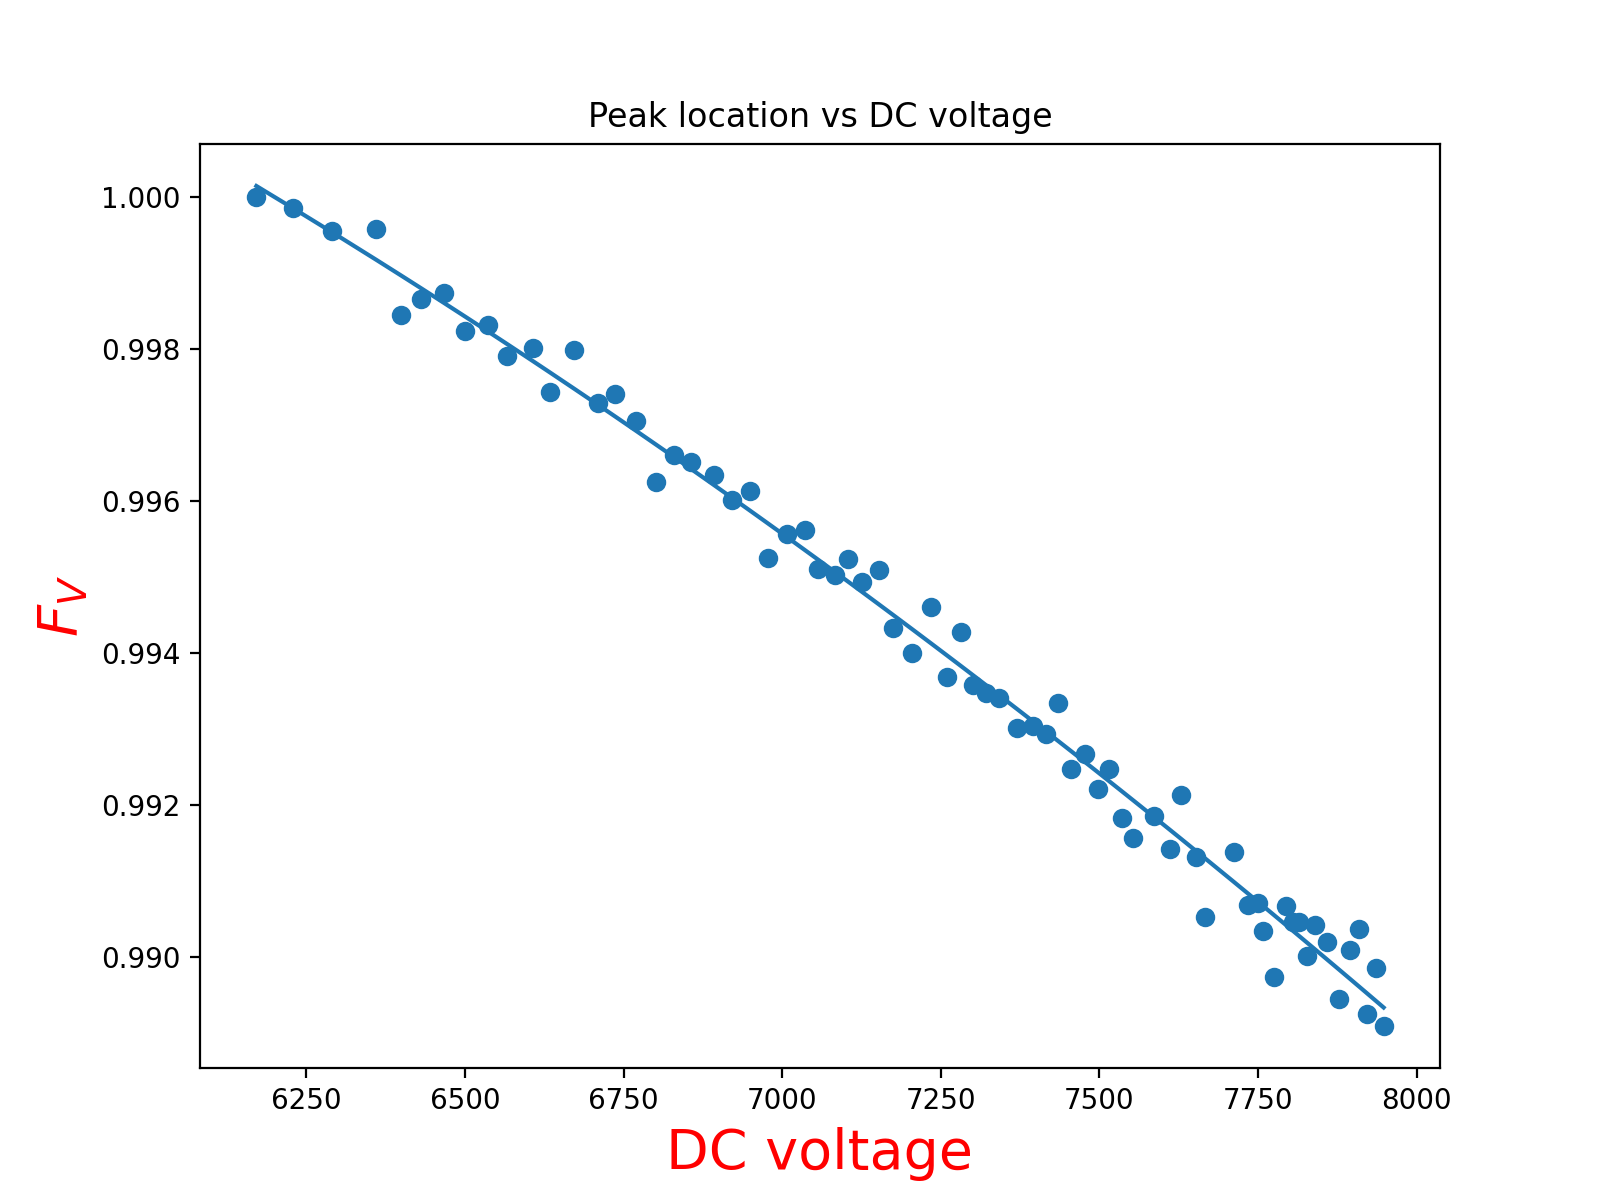

09-21-2022 15:19:16 | INFO | Selected Mode = count
09-21-2022 15:19:16 | INFO | Selected Mode = count
09-21-2022 15:19:16 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


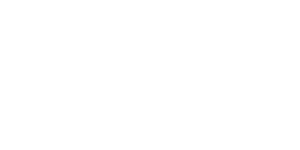

Iteration: 0 Voltage correction
Peaks in the 2D histogram [array([0.]), array([23.4375])]
Maximum pick value: [23.22223841] right-left side of the peak: [22.82197152 23.72257203]
Mass resolving power (MRP --> m/m_2-m_1): [25.78528233]


<IPython.core.display.Javascript object>

09-21-2022 15:19:18 | INFO | Selected Mode = count
09-21-2022 15:19:18 | INFO | Selected Mode = count
09-21-2022 15:19:18 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


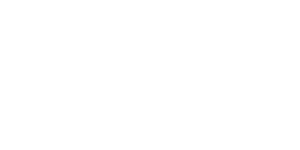

Iteration: 0 Bowl correction
Peaks in the 2D histogram [array([0.]), array([23.4375])]
Maximum pick value: [24.82353083] right-left side of the peak: [24.4232673  25.12372847]
Mass resolving power (MRP --> m/m_2-m_1): [25.78528233]
(array([31], dtype=int64),)
09-21-2022 15:19:18 | ERROR | Incorrect data type of passed arguments
09-21-2022 15:19:18 | ERROR | Incorrect data type of passed arguments
09-21-2022 15:19:18 | ERROR | Incorrect data type of passed arguments


<IPython.core.display.Javascript object>

09-21-2022 15:19:19 | INFO | Selected Mode = count
09-21-2022 15:19:19 | INFO | Selected Mode = count
09-21-2022 15:19:19 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


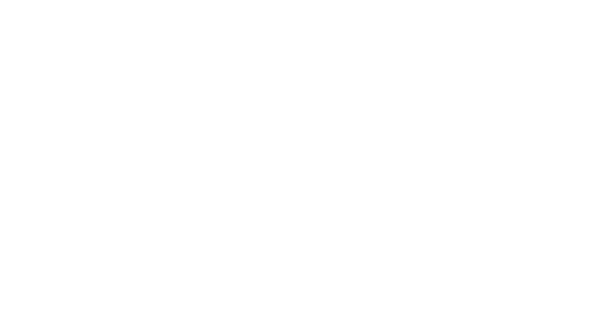

Iteration: 1 Voltage correction
Peaks in the 2D histogram [array([0.]), array([21.484375])]
Maximum pick value: [25.0298784] right-left side of the peak: [24.6295152 25.4302416]
Mass resolving power (MRP --> m/m_2-m_1): [31.25896493]


<IPython.core.display.Javascript object>


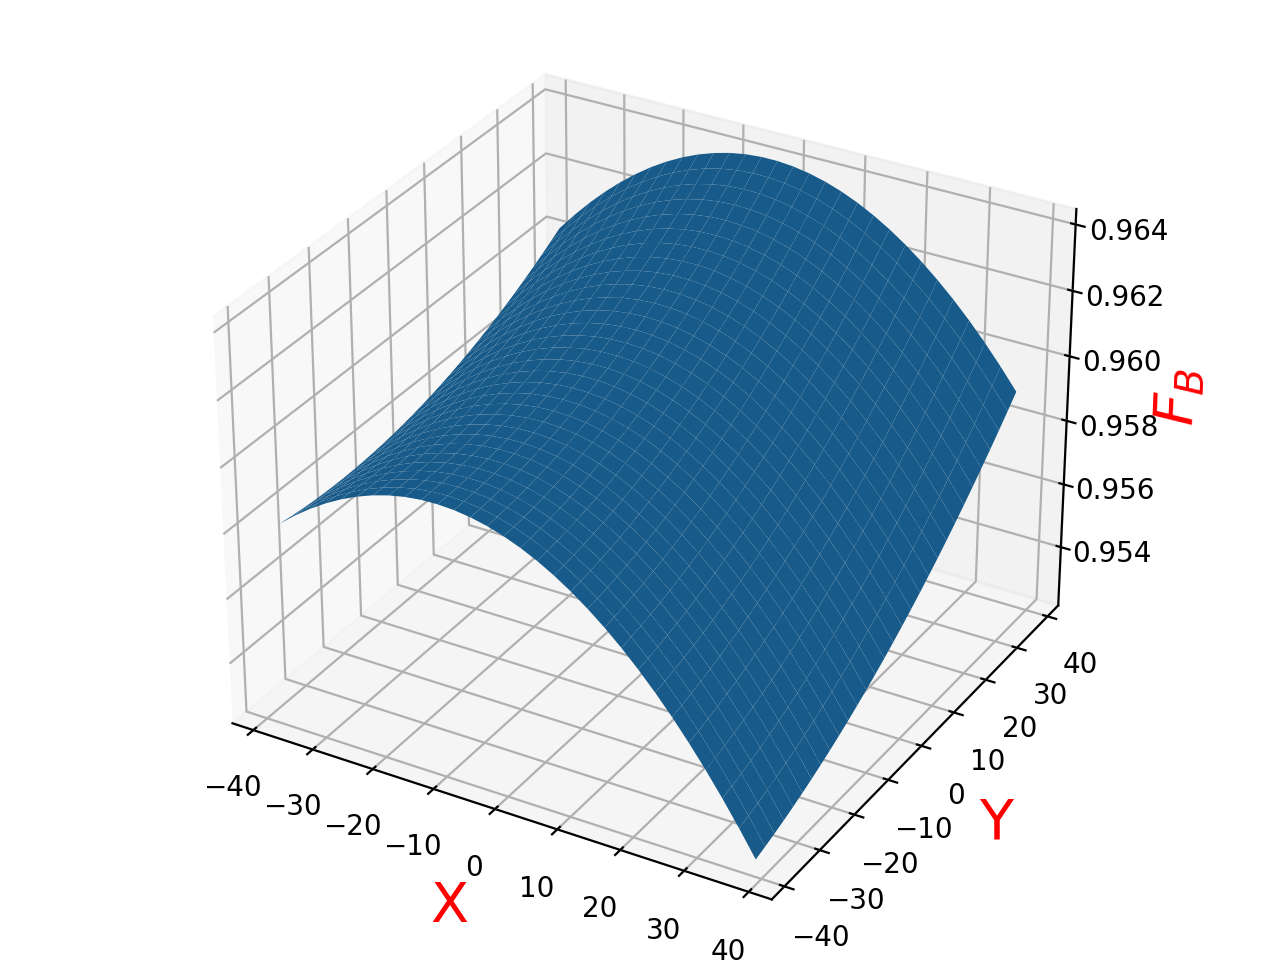

09-21-2022 15:19:20 | INFO | Selected Mode = count
09-21-2022 15:19:20 | INFO | Selected Mode = count
09-21-2022 15:19:20 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


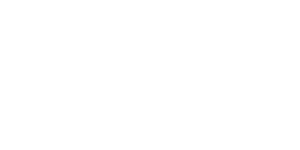

Iteration: 1 Bowl correction
Peaks in the 2D histogram [array([0.]), array([21.484375])]
Maximum pick value: [26.02378615] right-left side of the peak: [25.72359799 26.42403704]
Mass resolving power (MRP --> m/m_2-m_1): [31.25896493]
(array([33], dtype=int64),)
09-21-2022 15:19:21 | ERROR | Incorrect data type of passed arguments
09-21-2022 15:19:21 | ERROR | Incorrect data type of passed arguments
09-21-2022 15:19:21 | ERROR | Incorrect data type of passed arguments


<IPython.core.display.Javascript object>

09-21-2022 15:19:22 | INFO | Selected Mode = count
09-21-2022 15:19:22 | INFO | Selected Mode = count
09-21-2022 15:19:22 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


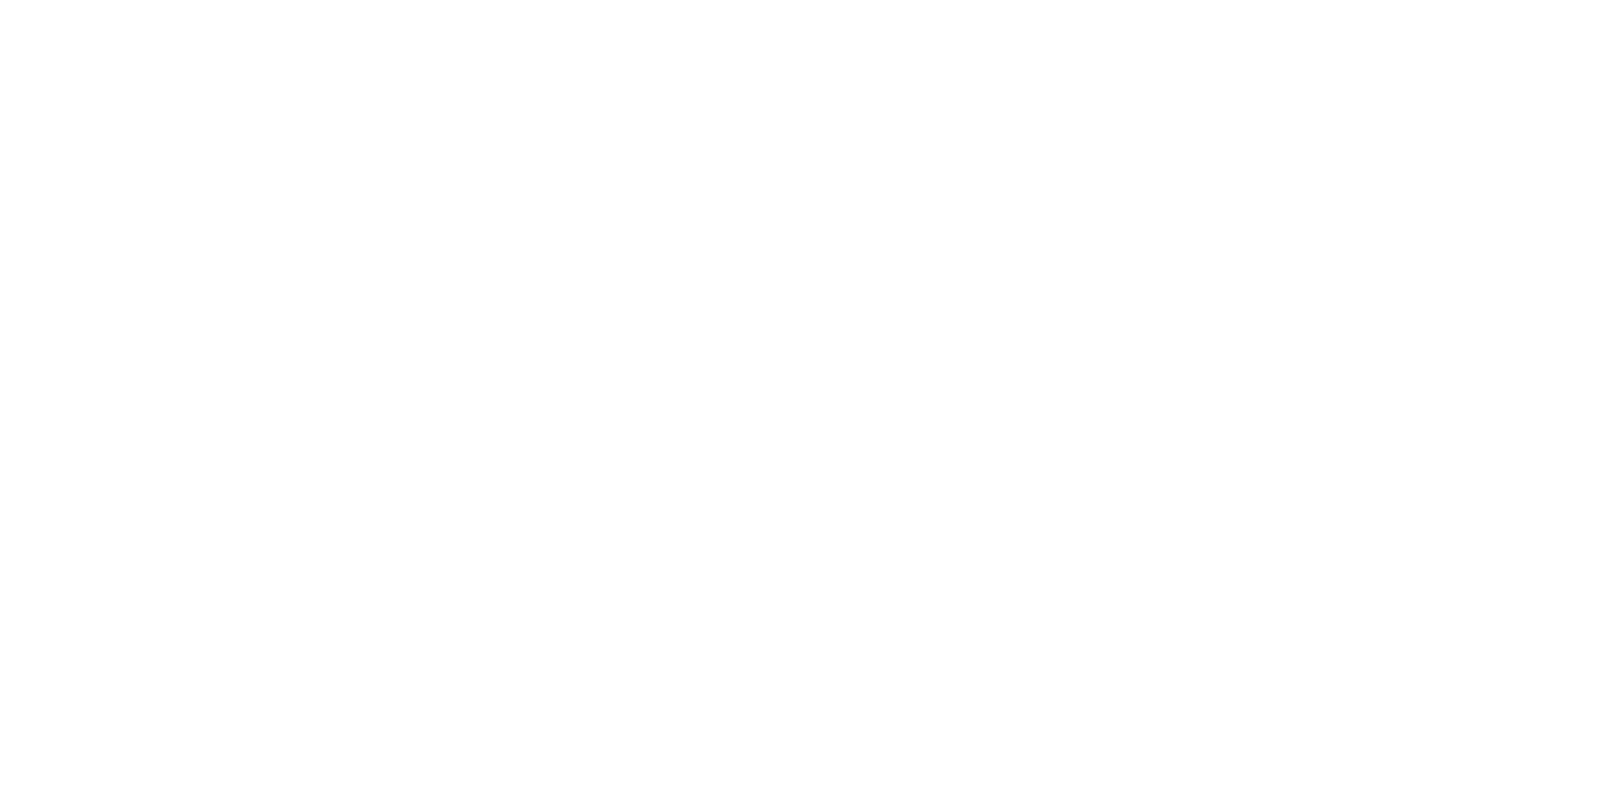

Iteration: 2 Voltage correction
Peaks in the 2D histogram [array([0.]), array([20.8984375])]
Maximum pick value: [25.9304965] right-left side of the peak: [25.63022968 26.33085225]
Mass resolving power (MRP --> m/m_2-m_1): [37.0106496]


<IPython.core.display.Javascript object>


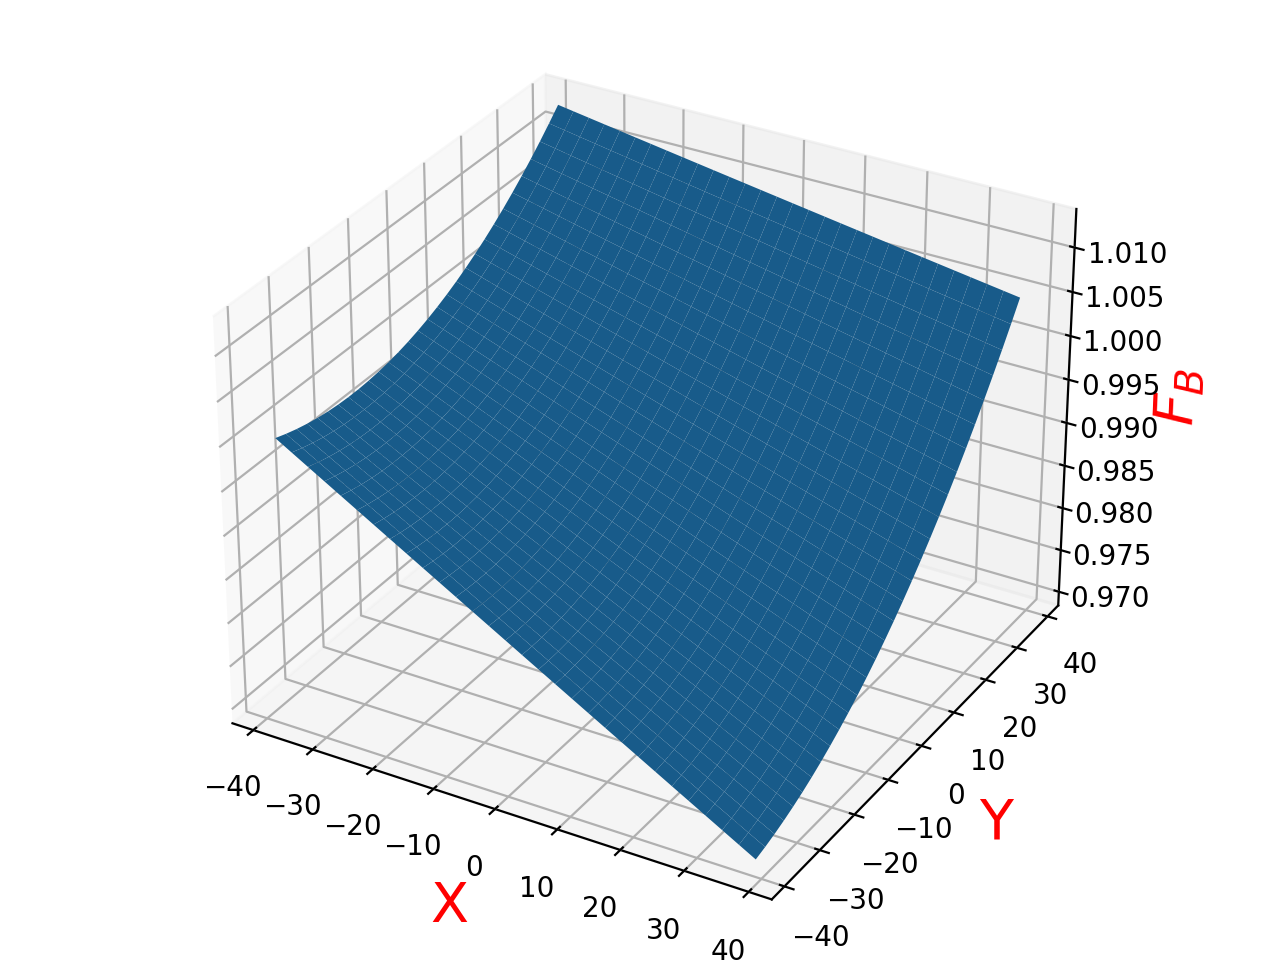

09-21-2022 15:19:24 | INFO | Selected Mode = count
09-21-2022 15:19:24 | INFO | Selected Mode = count
09-21-2022 15:19:24 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


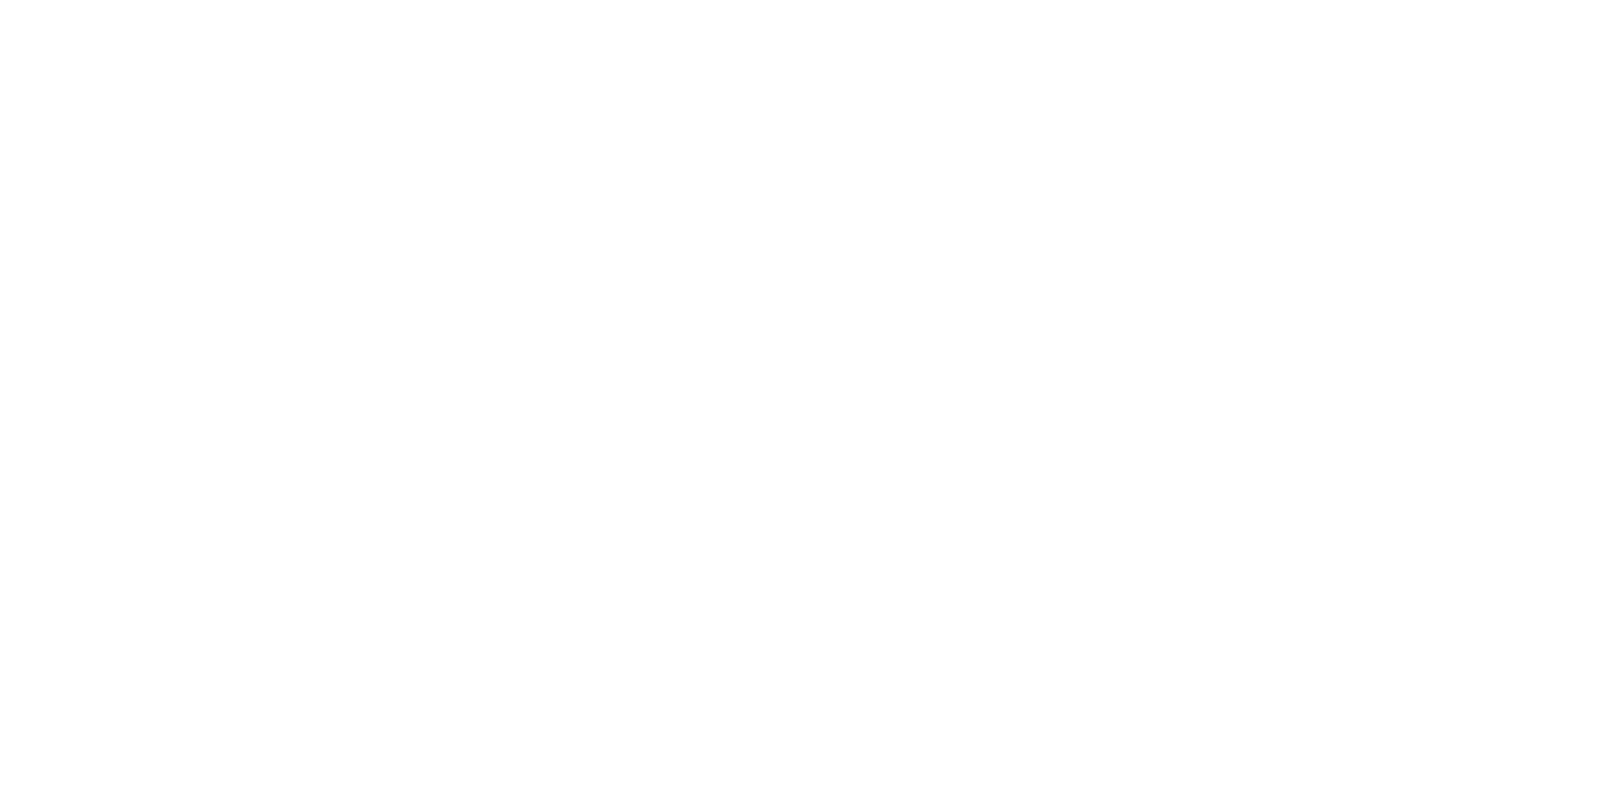

Iteration: 2 Bowl correction
Peaks in the 2D histogram [array([0.]), array([20.8984375])]
Maximum pick value: [26.12897794] right-left side of the peak: [25.92881394 26.42922394]
Mass resolving power (MRP --> m/m_2-m_1): [37.0106496]
(array([33], dtype=int64),)
09-21-2022 15:19:24 | ERROR | Incorrect data type of passed arguments
09-21-2022 15:19:24 | ERROR | Incorrect data type of passed arguments
09-21-2022 15:19:24 | ERROR | Incorrect data type of passed arguments


<IPython.core.display.Javascript object>

09-21-2022 15:19:26 | INFO | Selected Mode = count
09-21-2022 15:19:26 | INFO | Selected Mode = count
09-21-2022 15:19:26 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


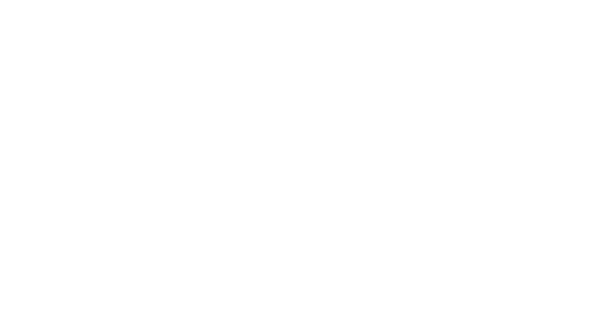

Iteration: 3 Voltage correction
Peaks in the 2D histogram [array([0.]), array([22.65625])]
Maximum pick value: [26.13101624] right-left side of the peak: [25.83074663 26.33119597]
Mass resolving power (MRP --> m/m_2-m_1): [52.21510811]


<IPython.core.display.Javascript object>


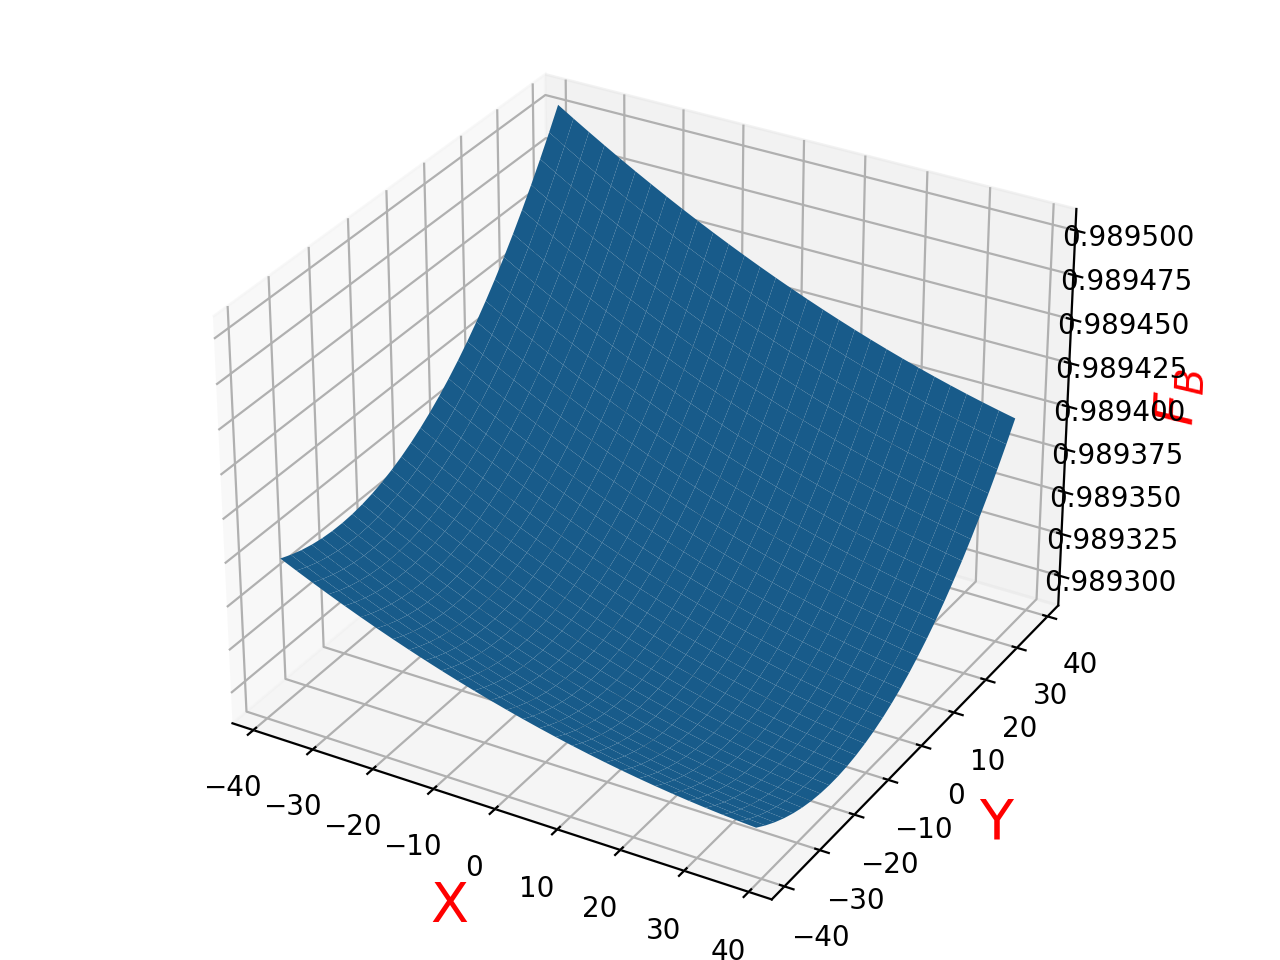

09-21-2022 15:19:28 | INFO | Selected Mode = count
09-21-2022 15:19:28 | INFO | Selected Mode = count
09-21-2022 15:19:28 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


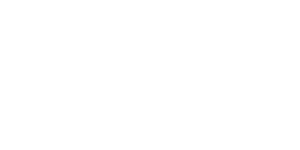

Iteration: 3 Bowl correction
Peaks in the 2D histogram [array([0.]), array([22.65625])]
Maximum pick value: [26.32582545] right-left side of the peak: [26.12568718 26.62603286]
Mass resolving power (MRP --> m/m_2-m_1): [52.21510811]


In [16]:
while True:
    fitPeak = tools.history_ex(mc_temp, dld_highVoltage, mean_t,mc_max=400, plot=False)
    corrFac_voltage = tools.voltage_corr(dld_highVoltage, mc_temp, fitPeak, ionsPerFitSegment, plot=True, fig_name='%s_'%break_i + figname)
    mc_temp2 = mc_temp / corrFac_voltage
    max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max = tools.massSpecPlot(mc_temp2[mc_temp2 < 100], 0.1, plot=False)
    mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
    if mrp_final < mrp and break_i != 0:
        mrp_final = mrp
        mc_f = mc_temp2
    print('Iteration:', iteration, 'Voltage correction')
    print('Peaks in the 2D histogram', fitPeak)
    print('Maximum pick value:',max_hist , 'right-left side of the peak:', left_right_peaks)
    print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
    corrFac_bowl = tools.bowl_corr(dld_x, dld_y, mc_temp2, mcIdeal=max_hist, mc_min=max_paek_edges[0], mc_max=max_paek_edges[1], plot=True, fig_name='%s_'%break_i + figname)
    mc_temp3 = mc_temp2 / corrFac_bowl
    max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max = tools.massSpecPlot(mc_temp3[mc_temp3 < 100], 0.1, plot=False)
    mc_temp = mc_temp3
    
    print('Iteration:', iteration, 'Bowl correction')
    print('Peaks in the 2D histogram', fitPeak)
    print('Maximum pick value:',max_hist , 'right-left side of the peak:', left_right_peaks)
    print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
    if mrp_final < mrp and break_i != 0:
        mrp_final = mrp
        mc_f = mc_temp
    else:
        if break_i == 3:
            break
        break_i += 1

    iteration += 1


$\text{Peak the peaks that you want to use for linear correcction by slecting the red cross on top of the peak}$

In [44]:
max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max = tools.massSpecPlot(mc_f[mc_f < 100], 0.1, plot=True, prominence=50, distance=10,fig_name='cor_'+figname, text_loc='right')

09-21-2022 16:28:48 | INFO | Selected Mode = count
09-21-2022 16:28:48 | INFO | Selected Mode = count
09-21-2022 16:28:48 | INFO | Selected Mode = count
09-21-2022 16:28:48 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>

In [20]:
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]))

Peaks  0 is: 1.11
Peaks  1 is: 12.12
Peaks  2 is: 13.52
Peaks  3 is: 14.22
Peaks  4 is: 23.03
Peaks  5 is: 24.03
Peaks  6 is: 25.13
Peaks  7 is: 26.13


$\text{Here we should choose the m/c for the selected above peak}$

In [21]:
isotopeTableFile = '../../../files/isotopeTable.h5'
dataframe = data_tools.read_hdf5_through_pandas(isotopeTableFile)
elementsList = dataframe['element']
elementIsotopeList = dataframe['isotope']
elementMassList =  dataframe['weight']
abundanceList = dataframe['abundance']

elements = list(zip(elementsList,elementIsotopeList,elementMassList,abundanceList))
dropdownList = []
for element in elements:
    tupleElement = ("{} ({}) ({:.2f})".format(element[0],element[1],element[3]),element[2],)
    dropdownList.append(tupleElement)

chargeList = [(1,1,),(2,2,),(3,3,),(4,4,)]
dropdown = wd.dropdownWidget(dropdownList,"Elements")
dropdown.observe(wd.on_change)


chargeDropdown = wd.dropdownWidget(chargeList,"Charge")
chargeDropdown.observe(wd.on_change_charge)

wd.compute_element_isotope_values_according_to_selected_charge()

buttonAdd = wd.buttonWidget("ADD")
buttonDelete = wd.buttonWidget("DELETE")
buttonReset = wd.buttonWidget("RESET")

display(dropdown)
display(chargeDropdown)
display(buttonAdd)
display(buttonDelete)
display(buttonReset)
listMaterial = buttonAdd.on_click(wd.onClickAdd)
buttonDelete.on_click(wd.onClickDelete)
buttonReset.on_click(wd.onClickReset)

Dropdown(description='Elements', options=(('H (1) (99.98)', 1.01), ('H (2) (0.01)', 2.01), ('He (3) (0.00)', 3…

Dropdown(description='Charge', options=((1, 1), (2, 2), (3, 3), (4, 4)), value=1)

Button(description='ADD', icon='check', style=ButtonStyle(), tooltip='ADD')

Button(description='DELETE', icon='check', style=ButtonStyle(), tooltip='DELETE')

Button(description='RESET', icon='check', style=ButtonStyle(), tooltip='RESET')

In [45]:
peaks_chos = []
for i in range(len(variables.peaks_idx)):
    peaks_chos.append(peaks_sides[variables.peaks_idx[i],0])
peaks_chos = np.array(peaks_chos)
listMaterial = np.array(listMaterial)
print('highest peak in the mc histogram:', peaks_chos)
print('highest peak in the ideal mc histogram:', variables.listMaterial)

highest peak in the mc histogram: [ 1.10854939 12.1184348  26.13101624]
highest peak in the ideal mc histogram: [2.01, 12.0, 25.97]


$\text{Above you should see the selected peak values and the ideal m/c for them seperatly. By runing the below cell linear correction aplies on the m/c and the final result is plotted}$

In [46]:
# For quadratic you need at least 3 points
mc_final = tools.linear_correction(mc_f, peaks_chos, np.array(variables.listMaterial), kind='linear')

[1.81318038 0.99022689 0.99383812]


09-21-2022 16:30:03 | INFO | Selected Mode = count
09-21-2022 16:30:03 | INFO | Selected Mode = count
09-21-2022 16:30:03 | INFO | Selected Mode = count
09-21-2022 16:30:03 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


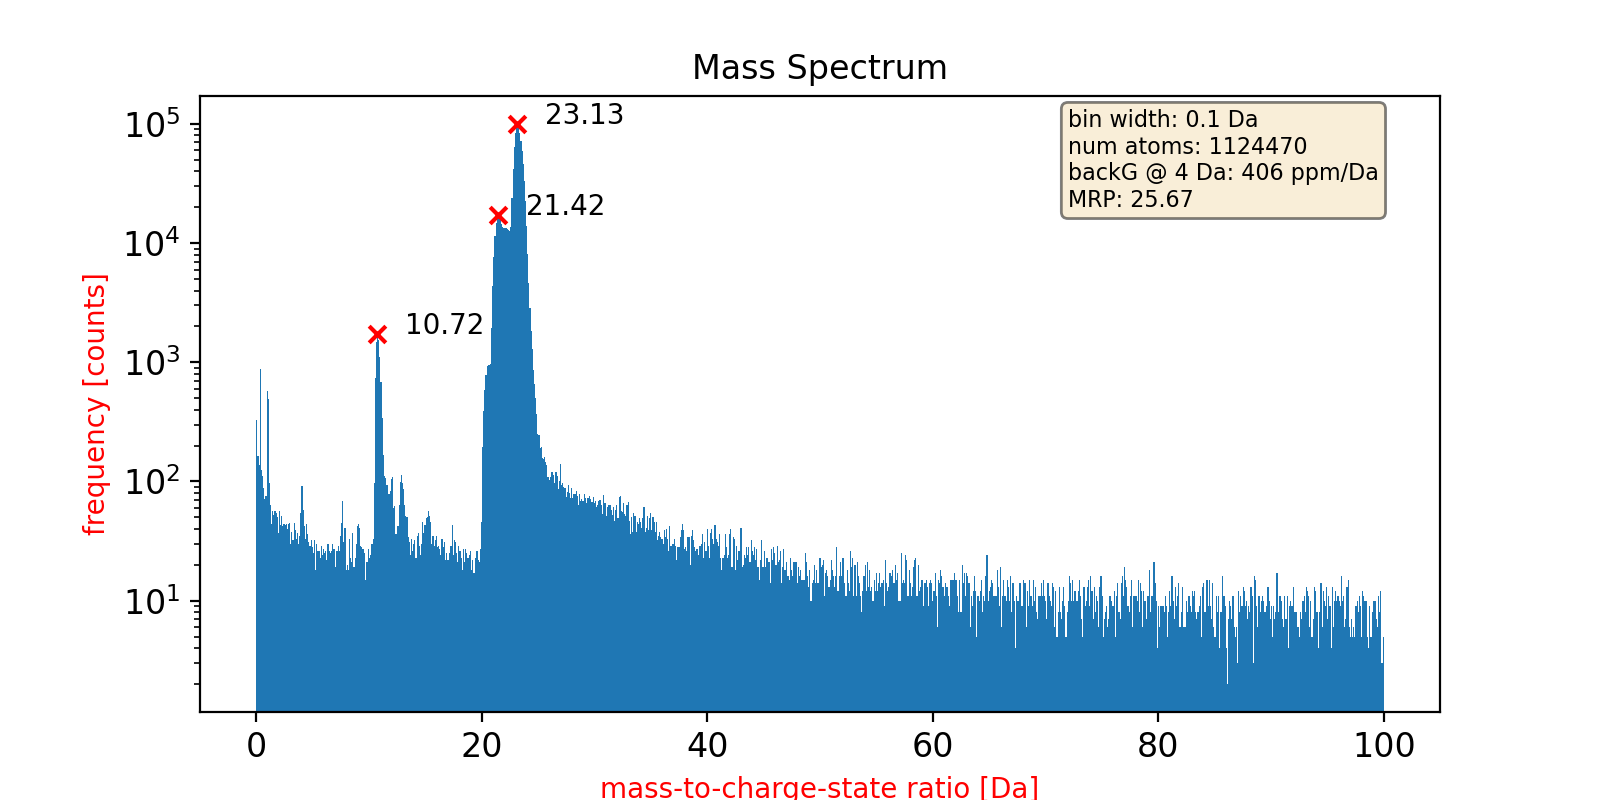

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [25.67416659]
09-21-2022 16:30:04 | INFO | Selected Mode = count
09-21-2022 16:30:04 | INFO | Selected Mode = count
09-21-2022 16:30:04 | INFO | Selected Mode = count
09-21-2022 16:30:04 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [52.21510811]
09-21-2022 16:30:05 | INFO | Selected Mode = count
09-21-2022 16:30:05 | INFO | Selected Mode = count
09-21-2022 16:30:05 | INFO | Selected Mode = count
09-21-2022 16:30:05 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


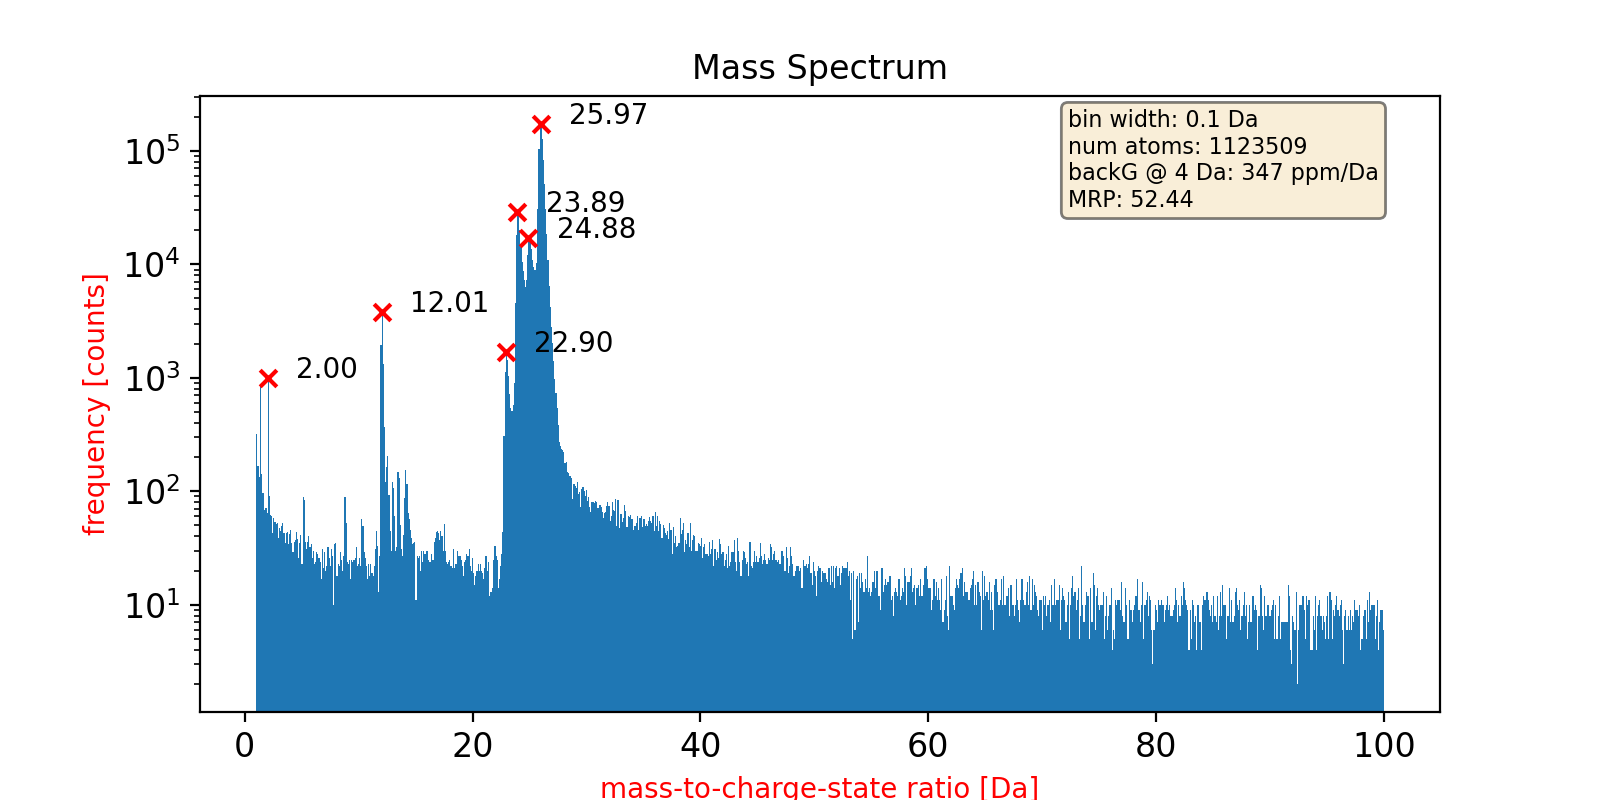

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [52.44120779]


In [47]:
max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max = tools.massSpecPlot(mc_seb[mc_seb < 100], 0.1, plot=True)
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max  = tools.massSpecPlot(mc_f[mc_f < 100], 0.1, plot=True, prominence=800, fig_name=None, text_loc='right')
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max  = tools.massSpecPlot(mc_final[mc_final < 100], 0.1, plot=True, prominence=800, fig_name='linear_cor_'+figname, text_loc='right')
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)

In [48]:
# add calibrated tof and mc to hdf file
data_loadcrop.add_tof_mc_data_to_hdf5(filename_main, dld_t, mc_final)
data_loadcrop.add_tof_mc_data_to_hdf5(filename, dld_t, mc_final)